Install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(50000, 28, 28)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model = Sequential()
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())
# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))
# Output layer với 10 node và dùng softmax function để chuyển sang xác suất.
model.add(Dense(10, activation='softmax'))

In [ ]:
# dùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.2827 - acc: 0.9199 - val_loss: 0.0723 - val_acc: 0.9809
Epoch 2/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.0552 - acc: 0.9842 - val_loss: 0.0511 - val_acc: 0.9851
Epoch 3/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.0335 - acc: 0.9904 - val_loss: 0.0471 - val_acc: 0.9867
Epoch 4/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.0226 - acc: 0.9938 - val_loss: 0.0414 - val_acc: 0.9880
Epoch 5/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.0158 - acc: 0.9955 - val_loss: 0.0374 - val_acc: 0.9891
Epoch 6/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.0107 - acc: 0.9971 - val_loss: 0.0366 - val_acc: 0.9889
Epoch 7/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.0071 - acc: 0.9982 - val_loss: 0.0445 - val_acc: 0.9862
Epoch 8/10
1563/1563 [=========================

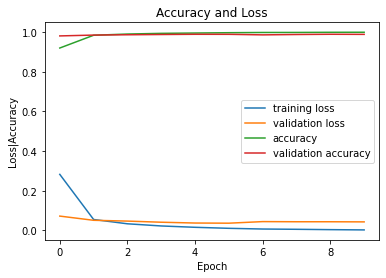

In [ ]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.033645786345005035, 0.9894999861717224]


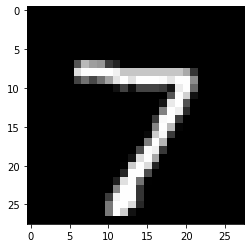

In [ ]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [ ]:
y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))

1/1 [==============================] - 0s 91ms/step
Giá trị dự đoán:  7


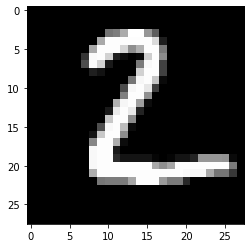

In [ ]:
plt.imshow(X_test[1].reshape(28,28), cmap='gray')

In [ ]:
y_predict = model.predict(X_test[1].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))

1/1 [==============================] - 0s 19ms/step
Giá trị dự đoán:  2
